In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_ocim_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Ocimene
0,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.324705,...,1,0,0,0,0,0,1,0,0,0.0
1,6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
2,7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,1,0,0,0,0,1,1,1,0.0
3,8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
4,12,0.0,0.0,0.0,0.0,0.180779,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,42963,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
44996,42965,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.261458,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
44997,42974,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
44998,42974,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Ocimene', 'index'], axis = 1)
y = df_knn[['X..Ocimene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

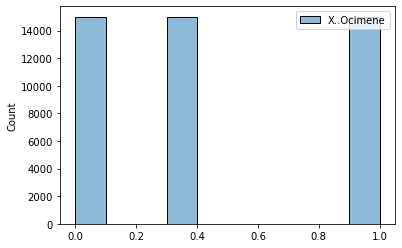

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.005923076923076545

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9919314047165887

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.9867262035471506

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([ 1.67981986e-06,  6.99932597e-06,  2.09062122e-05,  1.04390513e-04,
        1.18362076e-05,  4.64443910e-04,  6.03969802e-05,  7.37697399e-05,
        7.90294971e-06,  3.27731363e-05,  2.01503483e-05,  6.48806548e-05,
        1.53468043e-06,  1.80437755e-06,  2.26184083e-05,  2.89066661e-05,
        3.05119653e-05,  2.80528363e-05,  1.50374644e-05,  2.86662512e-05,
        4.83774481e-06,  1.01711358e-05,  2.59743252e-05,  2.18658511e-05,
        6.05225394e-05,  2.88352865e-06,  5.63400158e-04,  1.82185756e-06,
        2.21038384e-06,  2.83762013e-05,  6.56415933e-05,  1.99558683e-05,
        8.49187426e-05,  5.13853084e-05,  1.52169048e-04,  6.65492922e-06,
        3.01389502e-06,  4.12040457e-04,  1.15034851e-02,  1.81058921e-04,
        6.90125475e-07,  8.91664956e-06,  6.34450924e-05,  7.61855935e-05,
        3.57605384e-06,  1.57220742e-05,  4.36626825e-04,  1.44888015e-05,
        2.50197494e-04,  2.56781788e-07,  1.92541206e-06,  1.11627503e-17,
        1.39896232e-05,  

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_38,tfidf_62,tfidf_140,tfidf_161,hybrid,sativa,citrus,lemon,orange,pine
0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1,0,0,0,0,0
3,0.0,0.0,0.0,0.0,1,0,0,0,0,0
4,0.0,0.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
44995,0.0,0.0,0.0,0.0,0,0,0,0,0,0
44996,0.0,0.0,0.0,0.0,0,0,0,0,0,0
44997,0.0,0.0,0.0,0.0,0,0,0,0,0,0
44998,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_38',
 'tfidf_62',
 'tfidf_140',
 'tfidf_161',
 'hybrid',
 'sativa',
 'citrus',
 'lemon',
 'orange',
 'pine']

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_ocim.pkl")
joblib.dump(selector, "selector_knn_tfidf_ocim.pkl")

['selector_knn_tfidf_ocim.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.014427350427349382

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.004492291255752296

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.06702455710970641

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.97539088785253

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.9739156740428191

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'uniform', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.01438194206985526

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.004487626165604507

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.06698974671996086

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9757689771456612

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9739427617192645

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_ocim.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_ocim.pkl")

['y_test_knreg_tfidf_ocim.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.01449219753436053

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9732285883472304

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.004597429468812507

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.06780434697578398

In [47]:
y_test

,X..Ocimene
25275,0.346154
12561,1.000000
24707,0.346154
25066,0.346154
33429,0.346154
...,...
15262,1.000000
36801,0.346154
44919,0.000000
38317,0.346154


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

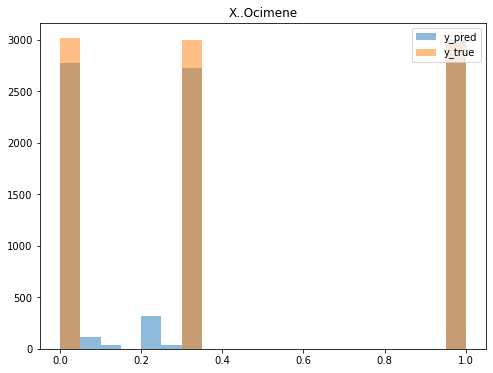

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Ocimene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_ocim.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.987
P-value: 0.000


<AxesSubplot:>

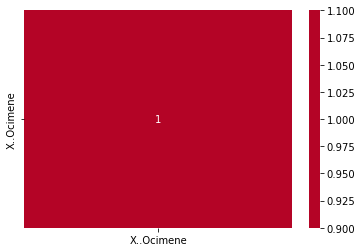

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)